In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt


/home/teddy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [33]:
thirty = '../db/rebus/30_rebus.hdf5'
three = '../db/rebus/3_rebus.hdf5'
f = h5.File(thirty, 'r')
k = h5.File(three, 'r')

keff_thirty = np.array(f['keff_BOC'])[0]
keff_three = np.array(k['keff_BOC'])[0]

for indx, x in enumerate(keff_three):
    if x < 1.0:
        kill_indx = indx
        break
keff_three = keff_three[:kill_indx]


In [42]:
thirty_x = np.arange(0, len(keff_thirty) * 30, 30)
three_x = np.arange(0, len(keff_three) * 3, 3)
print(len(thirty_x))
print(len(three_x))

# convert days to years
thirty_x  = thirty_x / 365
three_x = three_x / 365

730
1643


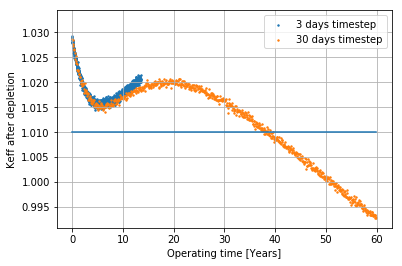

In [44]:
plt.scatter(three_x, keff_three, label='3 days timestep', s=2)
plt.scatter(thirty_x, keff_thirty, label='30 days timestep', s=2)
plt.plot(thirty_x, [1.01]*len(thirty_x))
plt.xlabel('Operating time [Years]')
plt.ylabel('Keff after depletion')
plt.title('Keff values for different Saltproc timesteps')
plt.legend()
plt.grid()
plt.show()